In [2]:
import pandas as pd


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
missing_values_train = train_data.isnull().values.any()
missing_values_test = test_data.isnull().values.any()
print(f"Missing values in train dataset:{missing_values_train}")
print(f"Missing values in test dataset:{missing_values_test}")
zero_values_train = (train_data == 0).sum()
zero_values_test = (test_data == 0).sum()
print(f"zero values in train dataset: \n {zero_values_train}")
print(f"zero values in test dataset: \n {zero_values_test}")
print(test_data.shape,train_data.shape)

Missing values in train dataset:False
Missing values in test dataset:False
zero values in train dataset: 
 Id                      1
MaxEStateIndex          0
MinEStateIndex          0
MaxAbsEStateIndex       0
MinAbsEStateIndex       1
                     ... 
fr_thiocyan          3360
fr_thiophene         3152
fr_unbrch_alkane     3131
fr_urea              3215
lipophilicity        2415
Length: 230, dtype: int64
zero values in test dataset: 
 Id                     0
MaxEStateIndex         0
MinEStateIndex         0
MaxAbsEStateIndex      0
MinAbsEStateIndex      0
                    ... 
fr_thiazole          783
fr_thiocyan          840
fr_thiophene         796
fr_unbrch_alkane     770
fr_urea              806
Length: 229, dtype: int64
(840, 229) (3360, 230)


we wish to remove features that dont give us any information. I also considered treating all zeros as missing values, but since I dont know
enough about the dataset and what the zero value represents. I decided to be cautious when treating the dataset. 

In [66]:
train_data = train_data.loc[:, ~train_data.T.duplicated()]
    #remove features with constant values across all samples

print(f"Dataset shape after removing constant features: {train_data.shape}")

Dataset shape after removing constant features: (3360, 217)


seperate labels from train set

In [67]:
X = train_data.drop(columns=['lipophilicity']) 
y = train_data['lipophilicity']  
print(X.shape,y.shape)


(3360, 216) (3360,)


now we need to do the same for the test set:

In [68]:
remaining_features = X.columns
test_data = test_data[remaining_features]
print(test_data.shape,X.shape)

(840, 216) (3360, 216)


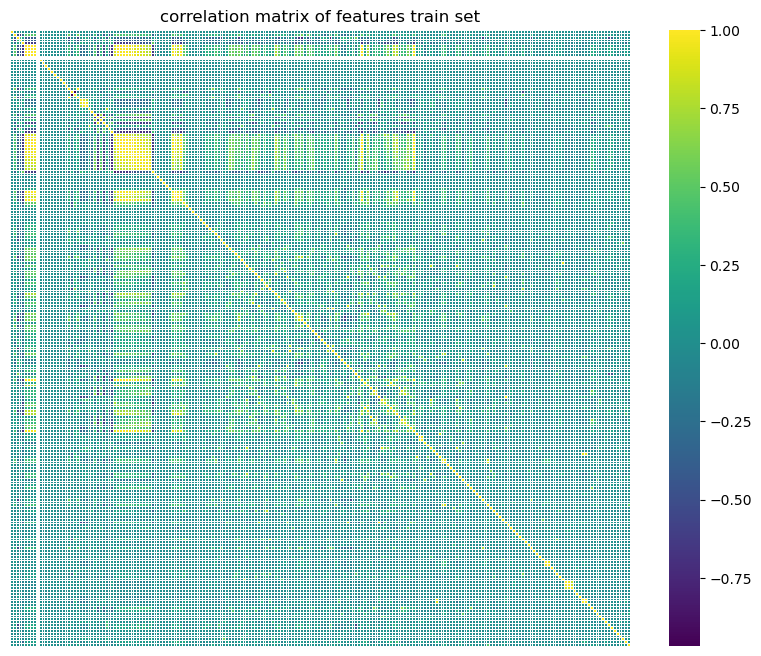

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X_df = pd.DataFrame(X)
corr_matrix = X_df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=False, cmap='viridis', linewidths=0.5, xticklabels=False, yticklabels=False)
plt.title('correlation matrix of features train set')
plt.show()

as we can see from the correlation matrix, there are a lot of features that are linearly dependent on each other. So that we can drop 
these features without expecting a huge decrease in performance. 

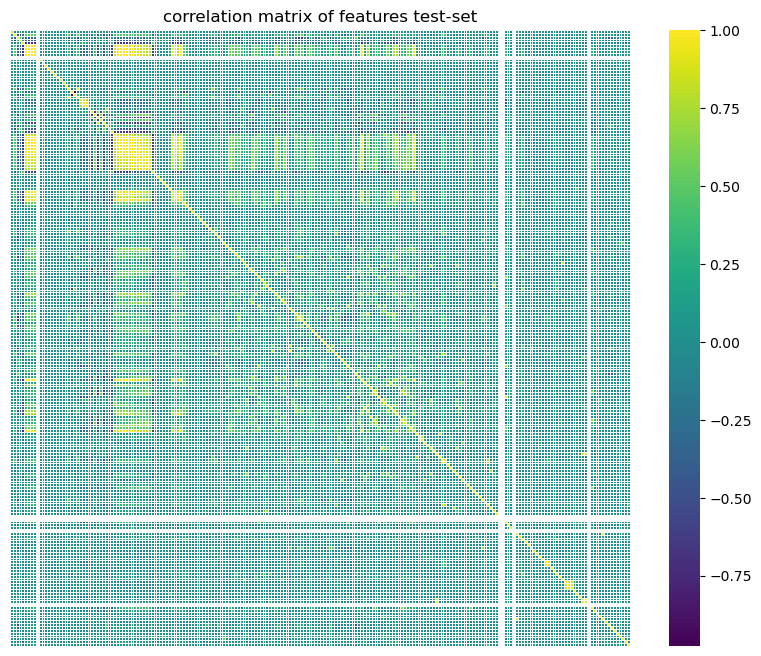

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X_df = pd.DataFrame(test_data)
corr_matrix = X_df.corr()

plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=False, cmap='viridis', linewidths=0.5, xticklabels=False, yticklabels=False)
plt.title('correlation matrix of features test-set')
plt.show()

here we can see that the fake features generated is the white linje in the test dataset, that does not match the trainingset

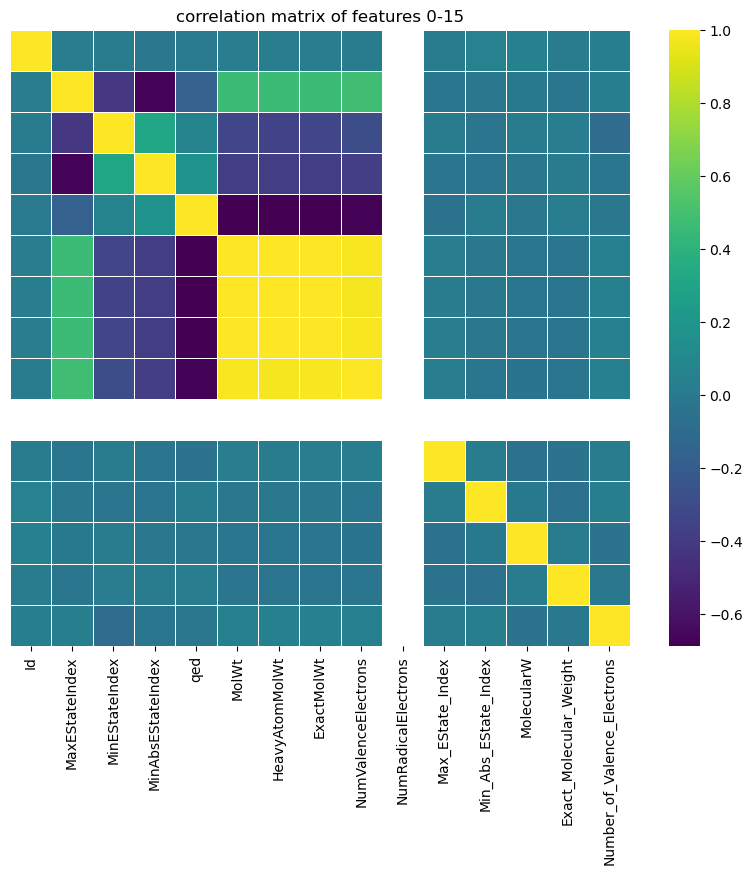

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X_df = pd.DataFrame(test_data)


X_subset = X_df.iloc[:, 0:15]  
    # Include features from 0-15


corr_matrix = X_subset.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=False, cmap='viridis', linewidths=0.5, xticklabels=True, yticklabels=False)
plt.title('correlation matrix of features 0-15')
plt.show()


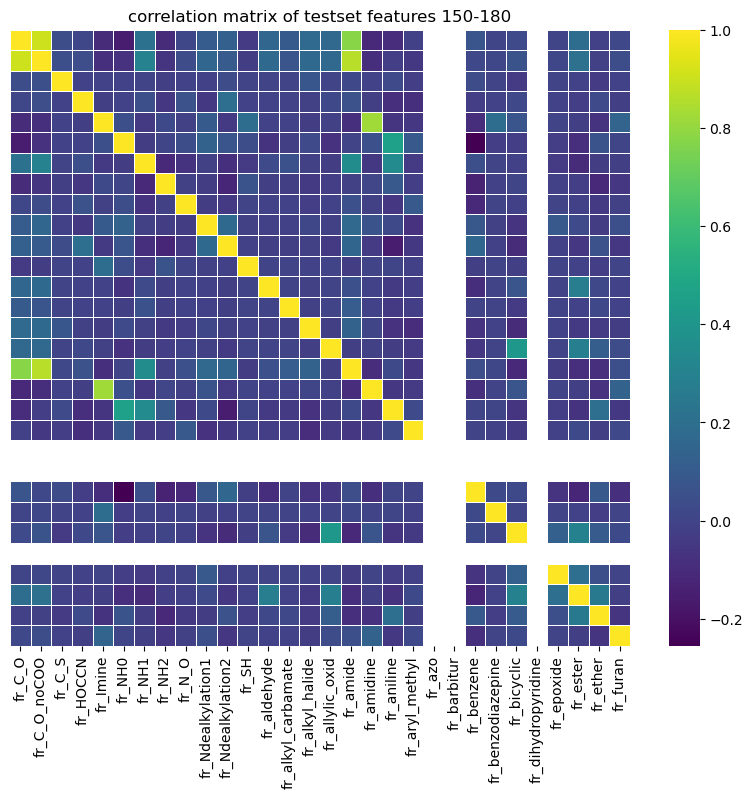

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X_df = pd.DataFrame(test_data)


X_subset = X_df.iloc[:, 150:180] 
    # Include features from 150-180


corr_matrix = X_subset.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=False, cmap='viridis', linewidths=0.5, xticklabels=True, yticklabels=False)
plt.title('correlation matrix of testset features 150-180')
plt.show()

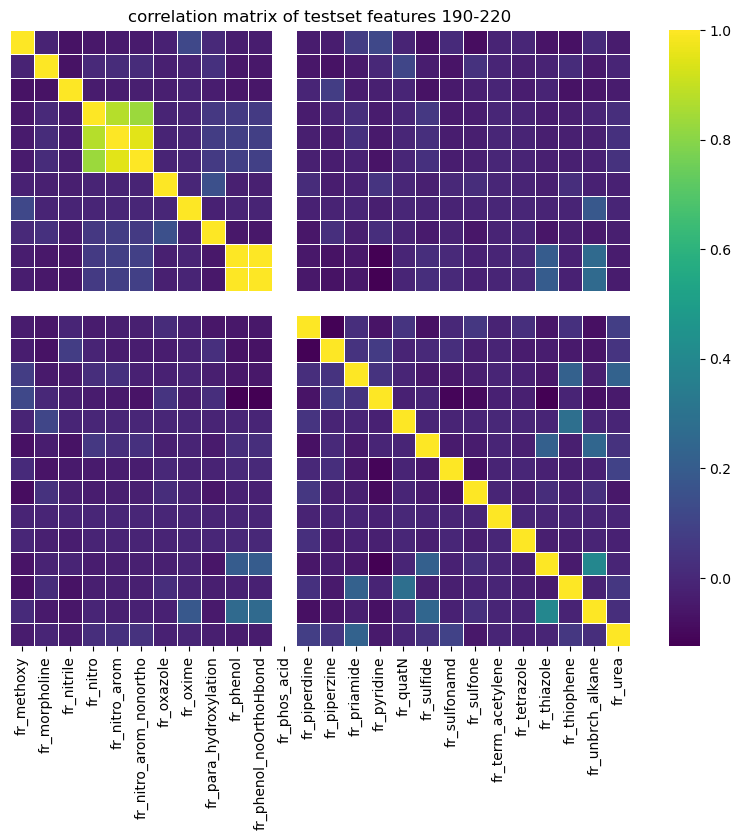

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X_df = pd.DataFrame(test_data)


X_subset = X_df.iloc[:, 190:220]  
    #include features from 190-220


corr_matrix = X_subset.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=False, cmap='viridis', linewidths=0.5, xticklabels=True, yticklabels=False)
plt.title('correlation matrix of testset features 190-220')
plt.show()


drop these features from both training and test set:

In [74]:
print(test_data.shape,X.shape)
columns_to_drop = ['fr_azo', 'fr_barbitur', 'fr_dihydropyridine', 'fr_phos_ester', 'fr_phos_acid','NumRadicalElectrons']
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')
X = X.drop(columns=columns_to_drop, errors='ignore')
print(test_data.shape,X.shape)

(840, 216) (3360, 216)
(840, 211) (3360, 211)


Here we can see that the dataset is highly correlated, therefore we need a different approach. Because of this I will try
using Principal component analysis (PCA) instead. 
https://stackoverflow.com/questions/65302136/what-we-should-do-with-highly-correlated-features


In [75]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
test_scaled = scaler.transform(test_data)  
    #z_scale all values


pca = PCA(n_components=0.9)
test_pca = pca.fit_transform(test_scaled) 
X_pca = pca.transform(X_scaled)
    #fits the transformation on test set. 


print(test_pca.shape, X_pca.shape)
    #check if they still have the same amount of features
print(f"Number of components chosen: {pca.n_components_}")
print(f"Explained variance by each component: \n{pca.explained_variance_ratio_}")


(840, 68) (3360, 68)
Number of components chosen: 68
Explained variance by each component: 
[0.16232677 0.05470347 0.05031363 0.04431853 0.03205814 0.0308686
 0.02655514 0.02507555 0.02262951 0.02125063 0.01957654 0.01711059
 0.01553722 0.01451617 0.01418261 0.01366353 0.01267852 0.01234056
 0.01173632 0.01121761 0.01086076 0.0103513  0.0100579  0.00957732
 0.00948407 0.00929989 0.00910306 0.0088215  0.00852192 0.00806849
 0.00754686 0.00713656 0.0069629  0.00674623 0.00663459 0.00640825
 0.00632289 0.00610316 0.00596744 0.00581772 0.00567442 0.00561531
 0.00552171 0.00541234 0.00534672 0.00523085 0.00517425 0.00509026
 0.00505399 0.00487118 0.00476983 0.0047061  0.00461184 0.00460047
 0.00456481 0.00443083 0.00435048 0.00431565 0.00422988 0.00421001
 0.00407931 0.00398883 0.00397293 0.00387689 0.00384929 0.00375584
 0.00365623 0.00359404]


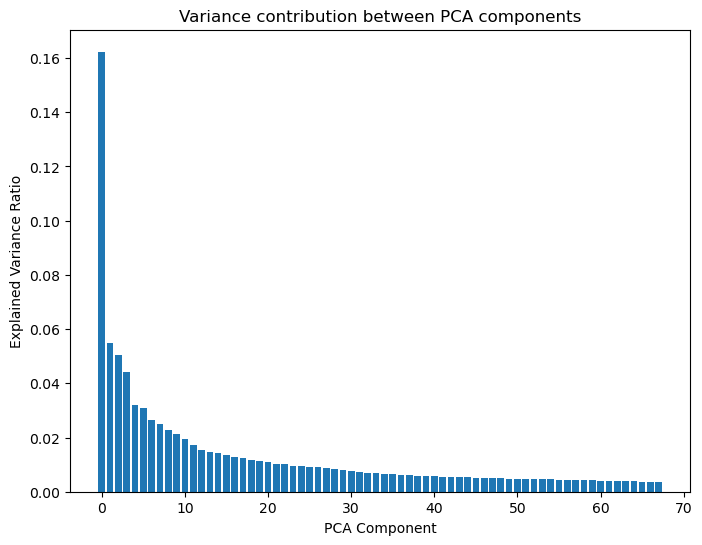

In [76]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8,6))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.xlabel('PCA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance contribution between PCA components')
plt.show()



By visualizing the results, there is a clear difference between the contribution of the features.
When testing it could be smart to adjust the amount of PCA components used. 

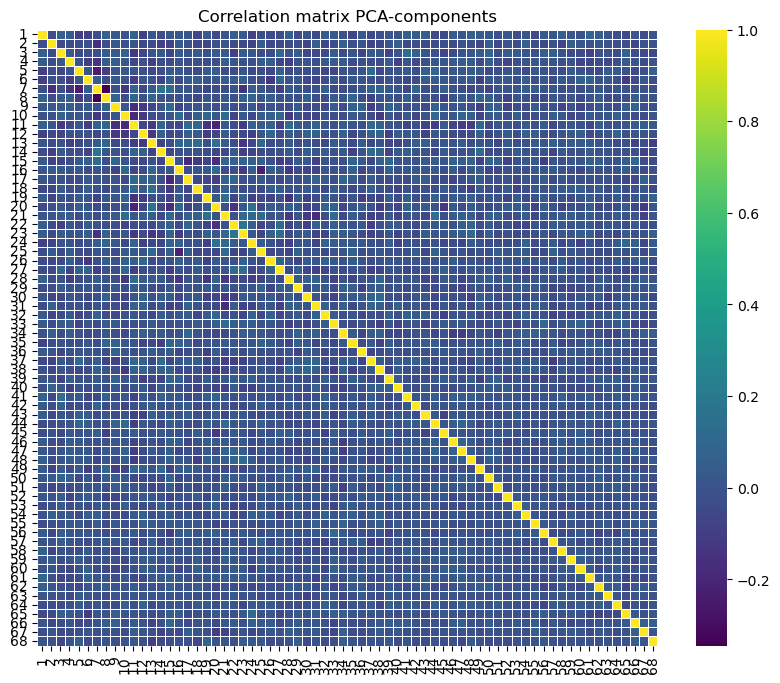

In [77]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_pca_df = pd.DataFrame(X_pca)
    #convert to panda data
corr_matrix = X_pca_df.corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=False, cmap='viridis',linewidths=0.5, xticklabels=range(1, len(corr_matrix) + 1),
            yticklabels=range(1, len(corr_matrix) + 1))
plt.title('Correlation matrix PCA-components')
plt.show()





we can see that the new features created is not correlated to each other anymore, which hopefully will result in the data being able
to pick up underlying patterns and predict whether the molecule likes fat. 

we are now done with preprocessing the data for now and i wish to test it on some ML models. 

In [78]:
import pandas as pd

df_X_pca = pd.DataFrame(X_pca)
df_test_pca = pd.DataFrame(test_pca)

y.to_csv('label_train.csv', index = False)
df_X_pca.to_csv('X_val_train.csv', index=False)
df_test_pca.to_csv('test_preprocessed.csv',index=False)
print("done")

done
